In [7]:
import sys
sys.path.append("../../utils/")
import fba_utils

import cobra
import matplotlib.pyplot as plt
import importlib
importlib.reload(fba_utils)
import tqdm
import numpy as np

# Read all relevant models

In [8]:
ich360=cobra.io.read_sbml_model('../../Model/iCH360/Escherichia_coli_iCH360.xml')
ich360_red=cobra.io.read_sbml_model('../../Model/iCH360red/iCH360red.xml')
iml1515=cobra.io.read_sbml_model('../data/metabolic_models/iML1515/iML1515.xml')


'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.


In [9]:

ich360.reactions.EX_glc__D_e.lower_bound=0.
ich360_red.reactions.EX_glc__D_e.lower_bound=0.
iml1515.reactions.EX_glc__D_e.lower_bound=0.

# iCH360 vs iMl1515 

## Growth on Glucose 

4it [00:53, 13.27s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


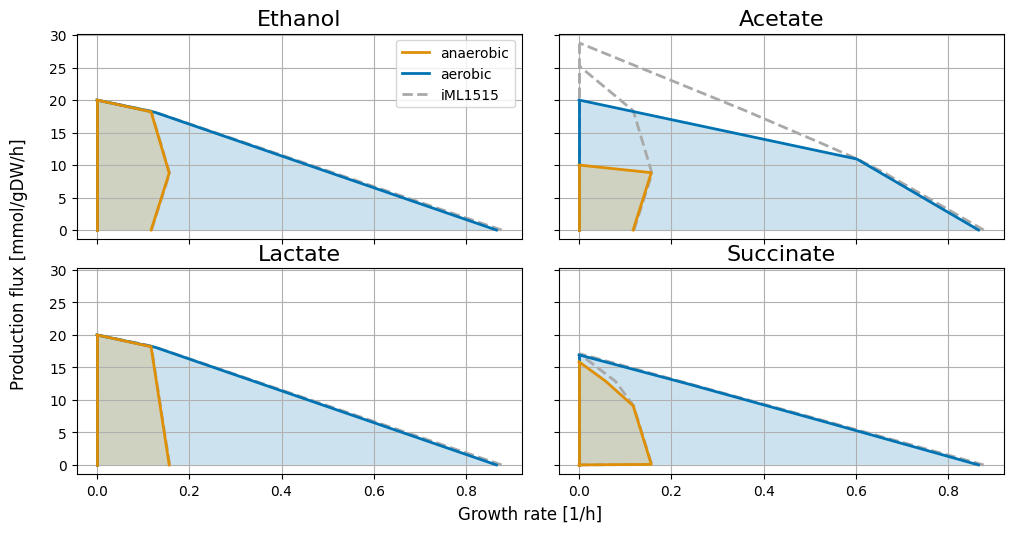

In [10]:
carbon_source='glc__D'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
aerobic_color="#0173B2"
anaerobic_color="#DE8F05"
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
        #iML1515======
    #aerobic
    fba_utils.plot_envelope(wt_model=iml1515,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color='darkgrey',
                        ls='--',
                        label='iML1515',
                        fill=False)
    #anaerobic
    fba_utils.plot_envelope(wt_model=iml1515,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color='darkgrey',
                        label=None,
                        ls='--',
                        fill=False)
    #=======
    #iCH360 (left)======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='aerobic',
                        color=aerobic_color)
    #anaerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='anaerobic',
                        color=anaerobic_color)
    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid()

ax[0,0].legend(reverse=True)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['svg','eps','png','pdf']:
    fig.savefig(f'../figures/ich360_vs_iml1515_ppp_glucose_type3.{extension}',
                bbox_inches='tight',
                )

## Aerobic Growth on lactate

3it [00:16,  5.62s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


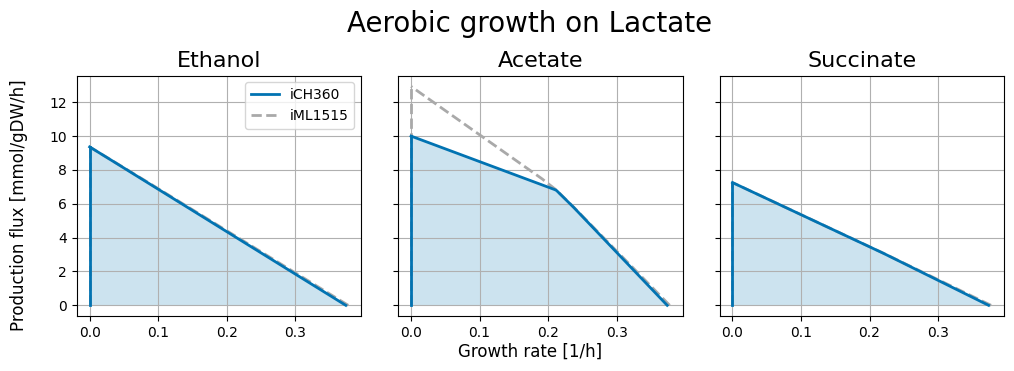

In [11]:
carbon_source='lac__D'
products=['EX_etoh_e','EX_ac_e','EX_succ_e']
product_names=['Ethanol','Acetate','Succinate']
aerobic_color="#0173B2"
anaerobic_color="#DE8F05"
fig,ax=plt.subplots(int(np.ceil(len(products)/3)),3,figsize=(10,3),sharex=True,sharey=True)
ax=ax.reshape(1,-1)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
            #iML1515======
    #aerobic
    fba_utils.plot_envelope(wt_model=iml1515,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color='darkgrey',
                        ls='--',
                        label='iML1515',
                        fill=False)
    #=======

    #iCH360 (left)======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='iCH360',
                        color=aerobic_color)

    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid()

ax[0,0].legend(reverse=True)
fig.suptitle("Aerobic growth on Lactate",fontsize=20,y=1.15)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['svg','eps','png','pdf']:
    fig.savefig(f'../figures/ich360_vs_iml1515_ppp_lactate_type3.{extension}',
                bbox_inches='tight',
                )

## Aerobic Growth on Glycerol

4it [00:21,  5.46s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


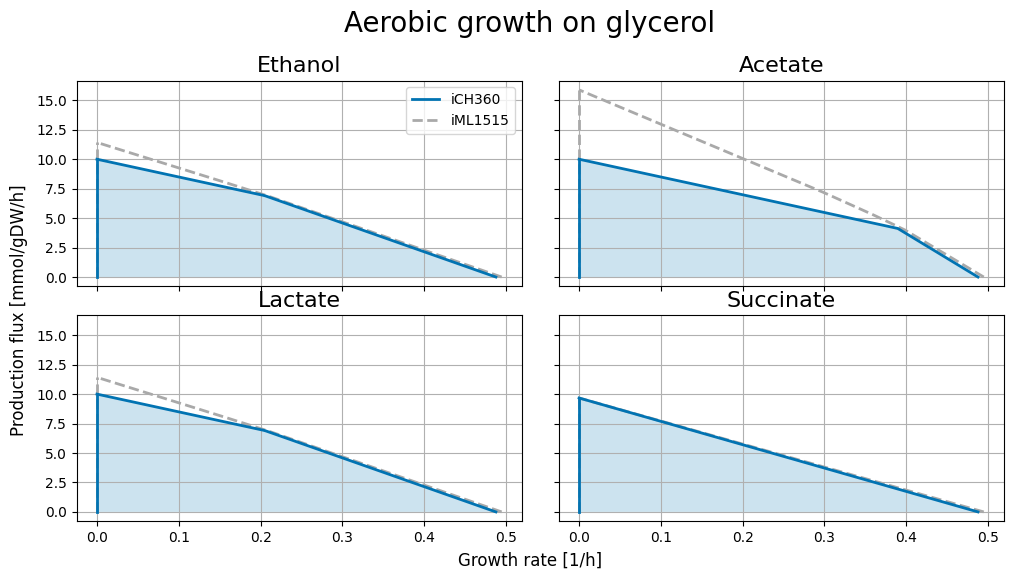

In [12]:
carbon_source='glyc'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
aerobic_color="#0173B2"
anaerobic_color="#DE8F05"
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
    #iML1515======
    #aerobic
    fba_utils.plot_envelope(wt_model=iml1515,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color='darkgrey',
                        ls='--',
                        label='iML1515',
                        fill=False)
    #=======
    #iCH360 (left)======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='iCH360',
                        color=aerobic_color)

    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid()

ax[0,0].legend(reverse=True)
fig.suptitle("Aerobic growth on glycerol",fontsize=20,y=1.1)
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['svg','eps','png','pdf']:
    fig.savefig(f'../figures/ich360_vs_iml1515_ppp_glycerol_type3.{extension}',
                bbox_inches='tight',
                )

# ich360 vs ich360 red

## Growth on Glucose

4it [00:11,  2.96s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


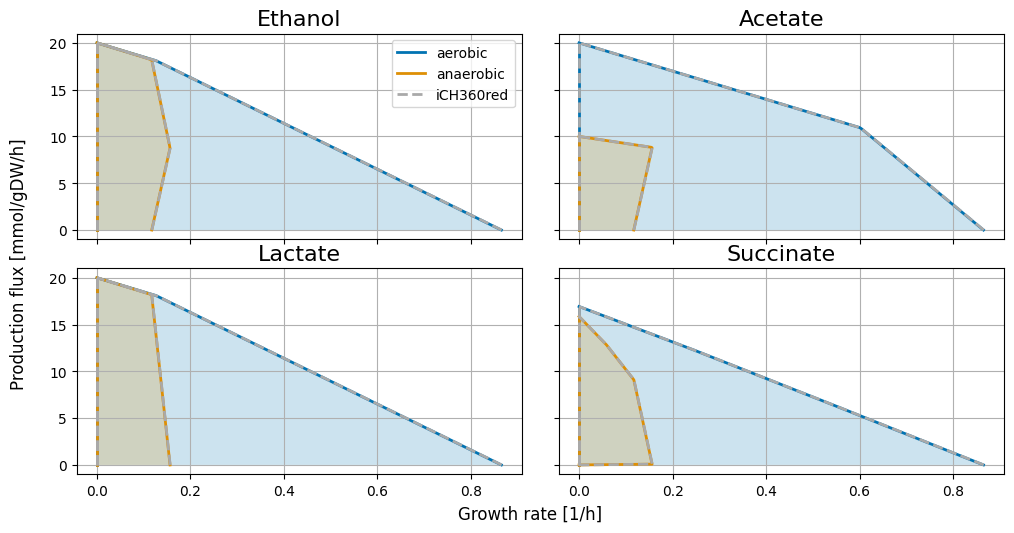

In [13]:
carbon_source='glc__D'
products=['EX_etoh_e','EX_ac_e','EX_lac__D_e','EX_succ_e']
product_names=['Ethanol','Acetate','Lactate','Succinate']
aerobic_color="#0173B2"
anaerobic_color="#DE8F05"
fig,ax=plt.subplots(int(np.ceil(len(products)/2)),2,figsize=(10,5),sharex=True,sharey=True)
plt.tight_layout()

for k,product in tqdm.tqdm(enumerate(products)):
    coords=np.unravel_index(k,ax.shape)
    #iCH360 (left)======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360_red,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='aerobic',
                        color=aerobic_color)
    #anaerobic
    fba_utils.plot_envelope(wt_model=ich360_red,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        label='anaerobic',
                        color=anaerobic_color)
    #iML1515======
    #aerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=[],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color='darkgrey',
                        ls='--',
                        label='iCH360red',
                        fill=False)
    #anaerobic
    fba_utils.plot_envelope(wt_model=ich360,
                        knockouts=['EX_o2_e'],
                        carbon_sources=[carbon_source],
                        target_reaction=product,
                        ax=ax[coords],
                        color='darkgrey',
                        label=None,
                        ls='--',
                        fill=False)
    #=======
    ax[coords].set_title(f'{product_names[k]}',fontsize=16)
    ax[coords].grid()

ax[0,0].legend()
fig.supxlabel('Growth rate [1/h]',y=-0.02)
fig.supylabel('Production flux [mmol/gDW/h]',x=-0.02)

for extension in ['svg','eps','png','pdf']:
    fig.savefig(f'../figures/ich360_vs_ich360red_ppp_glucose_type3.{extension}',
                bbox_inches='tight',
                )